In [15]:
#importing necessary libraries
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import random
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import statistics
import matplotlib

# Question 1

In [14]:
#Load the dataset
alumni = pd.read_csv('E:\\Linearreg\\alumni.csv')
alumni.head()

,school,percent_of_classes_under_20,student_faculty_ratio,alumni_giving_rate,private
0,Boston College,39,13,25,1
1,Brandeis University,68,8,33,1
2,Brown University,60,8,40,1
3,California Institute of Technology,65,3,46,1
4,Carnegie Mellon University,67,10,28,1


In [27]:
Y = alumni['alumni_giving_rate']     #response variable
X = alumni['percent_of_classes_under_20']   #predictor variable
print("Median of Y: %.4f" % statistics.median(Y))
print("variance of Y: %.4f" % statistics.variance(Y))
print("Standard deviation of Y: %.4f" % statistics.stdev(Y))
print("Median of X: %.4f" % statistics.median(X))
print("variance of X: %.4f" % statistics.variance(X))
print("Standard deviation of X: %.4f" % statistics.stdev(X))

Q1_X=alumni['percent_of_classes_under_20'].quantile(0.25)
Q3_X=alumni['percent_of_classes_under_20'].quantile(0.75)
IQR_X=Q3_X-Q1_X
Q1_Y=alumni['alumni_giving_rate'].quantile(0.25)
Q3_Y=alumni['alumni_giving_rate'].quantile(0.75)
IQR_Y=Q3_Y-Q1_Y
print("Interquartile Range of X: %.4f" % IQR_X)
print("Interquartile Range of Y: %.4f" % IQR_Y)

Median of Y: 29.0000
variance of Y: 180.6698
Standard deviation of Y: 13.4413
Median of X: 59.5000
variance of X: 174.0740
Standard deviation of X: 13.1937
Interquartile Range of X: 21.5000
Interquartile Range of Y: 19.7500


In [13]:
#Summary statistics of Y
Y.describe()

count    48.000000
mean     29.270833
std      13.441346
min       7.000000
25%      18.750000
50%      29.000000
75%      38.500000
max      67.000000
Name: alumni_giving_rate, dtype: float64

In [14]:
#Summary statistics of X
X.describe()

count    48.000000
mean     55.729167
std      13.193712
min      29.000000
25%      44.750000
50%      59.500000
75%      66.250000
max      77.000000
Name: percent_of_classes_under_20, dtype: float64

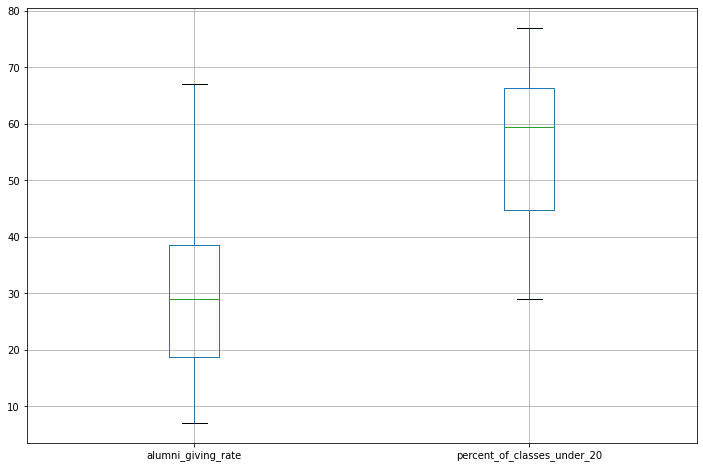

In [20]:
#Variables X & Y are continuous 
Y_X_boxplots = alumni.boxplot(column=['alumni_giving_rate','percent_of_classes_under_20'],figsize=(12,8))

In [25]:
#correlation b/w Y & X variables
Y_X_df = alumni[['alumni_giving_rate','percent_of_classes_under_20']]
Y_X_df.corr()

,alumni_giving_rate,percent_of_classes_under_20
alumni_giving_rate,1.00000,0.64565
percent_of_classes_under_20,0.64565,1.00000


<AxesSubplot:xlabel='percent_of_classes_under_20', ylabel='alumni_giving_rate'>

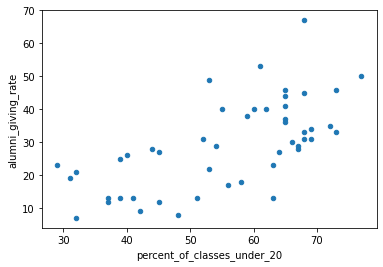

In [29]:
#scatter plot
alumni.plot(kind='scatter',x='percent_of_classes_under_20',y='alumni_giving_rate',alpha=1)

In [31]:
#OLS Linear Regression
results=smf.ols('alumni_giving_rate ~ percent_of_classes_under_20',data=alumni).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     alumni_giving_rate   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     32.88
Date:                Fri, 15 Oct 2021   Prob (F-statistic):           7.23e-07
Time:                        15:44:43   Log-Likelihood:                -179.38
No. Observations:                  48   AIC:                             362.8
Df Residuals:                      46   BIC:                             366.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

# Question 2

In [3]:
np.random.seed(7052)
X_mu, X_sigma = 2, 0.1   #mean and standard deviation
e_mu, e_sigma = 0, 0.5
X = np.random.normal(X_mu,X_sigma,100)
e = np.random.normal(e_mu,e_sigma,100)
Y = 10 + 5*X + e
print("Median of Y: %.4f" % statistics.median(Y))
print("variance of Y: %.4f" % statistics.variance(Y))
print("Standard deviation of Y: %.4f" % statistics.stdev(Y))
print("Median of X: %.4f" % statistics.median(X))
print("variance of X: %.4f" % statistics.variance(X))
print("Standard deviation of X: %.4f" % statistics.stdev(X))

Median of Y: 20.0187
variance of Y: 0.4344
Standard deviation of Y: 0.6591
Median of X: 1.9971
variance of X: 0.0087
Standard deviation of X: 0.0934


In [4]:
d = {'X':X, 'Y':Y}
df = pd.DataFrame(data=d)

In [5]:
df.describe()

,X,Y
count,100.000000,100.000000
mean,1.999833,20.010549
std,0.093418,0.659082
min,1.757524,18.160578
25%,1.928987,19.578923
50%,1.997107,20.018732
75%,2.062248,20.432654
max,2.208356,21.765294


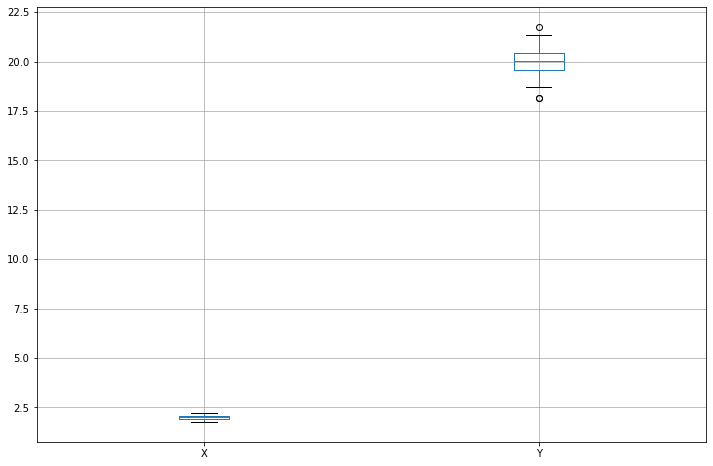

In [83]:
#boxplots
Y_X_boxplots = df.boxplot(column=['X','Y'],figsize=(12,8))   #there are outliers for Y?

In [6]:
df.corr()

,X,Y
X,1.000000,0.639476
Y,0.639476,1.000000


<AxesSubplot:xlabel='X', ylabel='Y'>

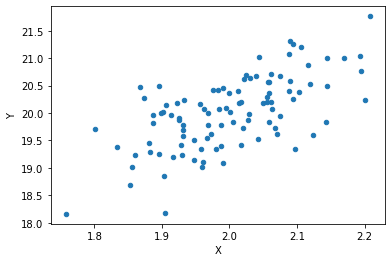

In [11]:
#scatter plot
scat = df.plot(kind='scatter',x='X',y='Y',alpha=1)
scat

In [58]:
results_2=smf.ols('Y ~ X',data=df).fit()
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     70.73
Date:                Fri, 15 Oct 2021   Prob (F-statistic):           3.35e-13
Time:                        17:41:46   Log-Likelihood:                -74.059
No. Observations:                 100   AIC:                             152.1
Df Residuals:                      98   BIC:                             157.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5745      1.119      9.453      0.0

In [64]:
A = df[['X']]
B = df[['Y']]
X_train,X_test,Y_train,Y_test=train_test_split(A,B,test_size=0.3,random_state=0)
reg=LinearRegression()
reg.fit(X_train,Y_train)
Y_pred=reg.predict(X_test)

In [74]:
mse=mean_squared_error(Y_pred,Y_test)
print("Linear Regression MSE: %.4f" % mse)

Linear Regression MSE: 0.2515


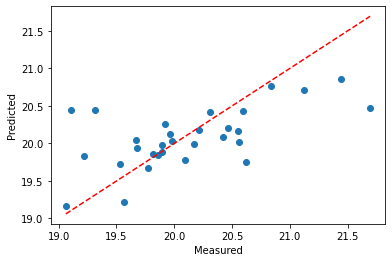

In [83]:
fig, ax = plt.subplots()
ax.scatter(Y_test, Y_pred)
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

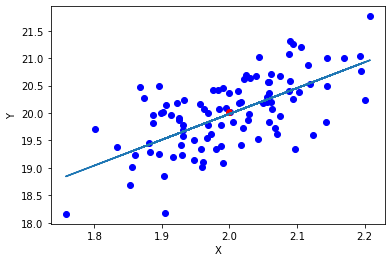

In [26]:
sample_mean_X = statistics.mean(X)
sample_mean_Y = statistics.mean(Y)
plt.scatter(X, Y, c='blue')
plt.scatter(sample_mean_X, sample_mean_Y, c='red')
plt.plot(X,10.5745 + 4.7050*X)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()